In [88]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [90]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)

def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [91]:
with open('data_cancer.csv', 'r') as to_read:
    cancer = pd.read_csv(to_read)
    cancer_data = cancer.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
    cancer_description = "Dataset Breast Cancer Wisconsin: fitur ukuran sel, tekstur, perimeter, area, smoothness, dan diagnosis (M = malignant, B = benign)"

In [92]:
print(cancer_data.head(15))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          M        17.99         10.38          122.80     1001.0   
1          M        20.57         17.77          132.90     1326.0   
2          M        19.69         21.25          130.00     1203.0   
3          M        11.42         20.38           77.58      386.1   
4          M        20.29         14.34          135.10     1297.0   
5          M        12.45         15.70           82.57      477.1   
6          M        18.25         19.98          119.60     1040.0   
7          M        13.71         20.83           90.20      577.9   
8          M        13.00         21.82           87.50      519.8   
9          M        12.46         24.04           83.97      475.9   
10         M        16.02         23.24          102.70      797.8   
11         M        15.78         17.89          103.60      781.0   
12         M        19.17         24.80          132.40     1123.0   
13         M        

<Axes: >

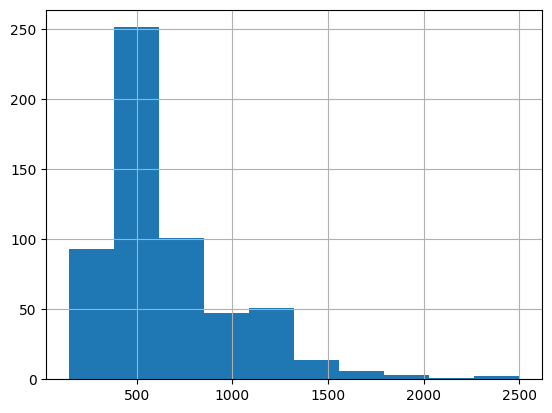

In [93]:
cancer_data.area_mean.hist()

In [94]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [95]:
normaltest(cancer_data['area_mean'])

NormaltestResult(statistic=np.float64(191.6778773687591), pvalue=np.float64(2.3860403182400484e-42))

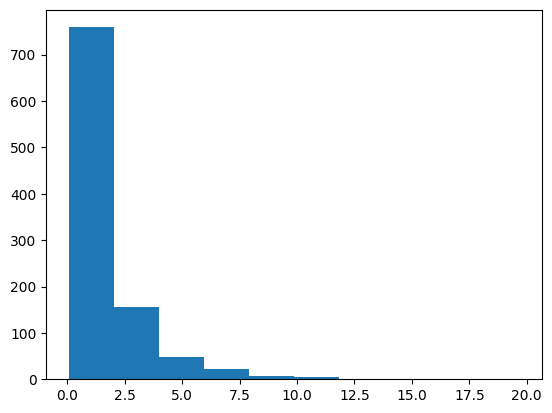

In [96]:
data = plot_exponential_data()

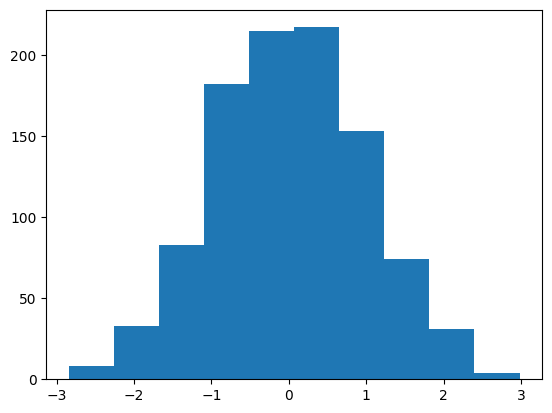

In [97]:
plt.hist(np.log(data));

In [102]:
log_diagnosis = np.log(cancer_data.area_mean)

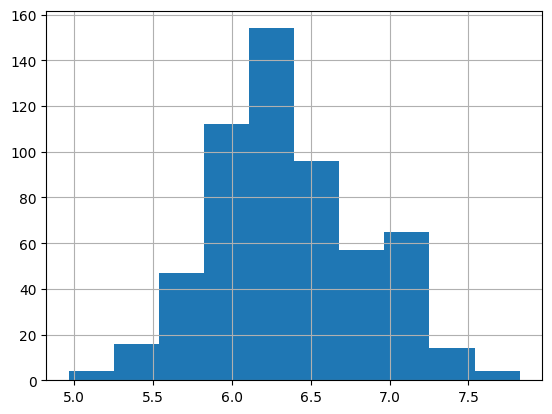

In [103]:
log_diagnosis.hist();

In [104]:
normaltest(log_diagnosis)

NormaltestResult(statistic=np.float64(7.811354623734911), pvalue=np.float64(0.020127317402592073))

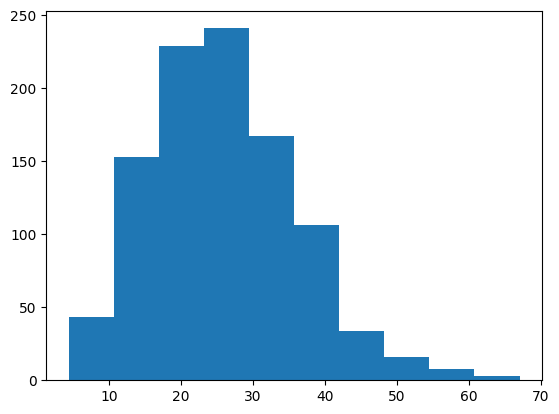

In [105]:
data = plot_square_normal_data()

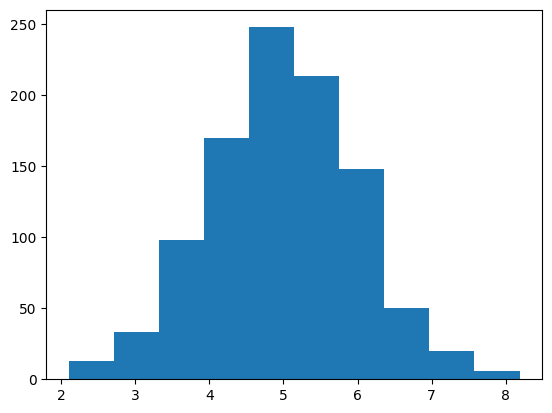

In [106]:
plt.hist(np.sqrt(data));

(array([ 19.,  77., 188., 130.,  53.,  51.,  36.,   9.,   3.,   3.]),
 array([11.97914855, 15.7822336 , 19.58531864, 23.38840369, 27.19148873,
        30.99457378, 34.79765882, 38.60074387, 42.40382891, 46.20691396,
        50.009999  ]),
 <BarContainer object of 10 artists>)

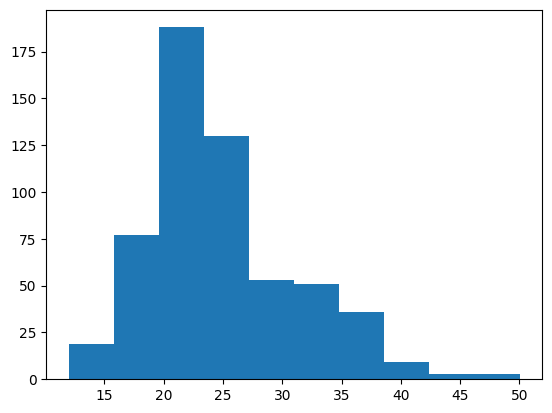

In [107]:
## Enter your code here
sqrt_area = np.sqrt(cancer_data.area_mean)
plt.hist(sqrt_area)

In [108]:
normaltest(sqrt_area)

NormaltestResult(statistic=np.float64(72.33415373934547), pvalue=np.float64(1.9626284450348965e-16))

In [109]:
from scipy.stats import boxcox

In [110]:
bc_result = boxcox(cancer_data.area_mean)
boxcox_area = bc_result[0]
lam = bc_result[1]

In [111]:
lam

np.float64(-0.21107162718953335)

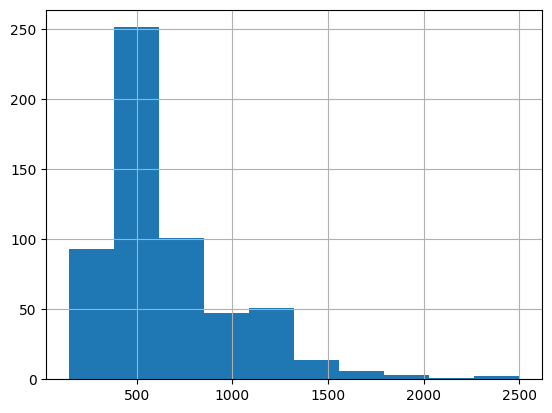

In [112]:
cancer_data['area_mean'].hist();

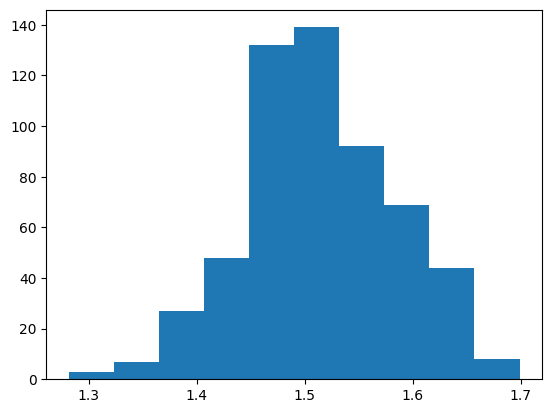

In [113]:
plt.hist(boxcox_radius);

In [114]:
normaltest(boxcox_radius)

NormaltestResult(statistic=np.float64(0.24234847081131372), pvalue=np.float64(0.8858795945548182))

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)

In [116]:
lr = LinearRegression()

In [117]:
y_col = "area_mean"

X = cancer_data.drop(y_col, axis=1)
y = cancer_data[y_col]


In [119]:
# Ubah diagnosis menjadi 0/1
cancer_data['diagnosis_num'] = cancer_data['diagnosis'].map({'B':0, 'M':1})

y = cancer_data['diagnosis_num']


In [122]:
X = cancer_data[['area_mean']]  # pastikan tidak termasuk diagnosis

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

print(X_pf[:5])

[[1.0010000e+03 1.0020010e+06]
 [1.3260000e+03 1.7582760e+06]
 [1.2030000e+03 1.4472090e+06]
 [3.8610000e+02 1.4907321e+05]
 [1.2970000e+03 1.6822090e+06]]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3,
                                                    random_state=72018)

In [124]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [143]:
y_train_positive = y_train + 1e-6  # tambah konstanta kecil supaya >0
y_train_bc, lam = boxcox(y_train_positive)


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

# Data
X = cancer_data[['area_mean']]
y = cancer_data['diagnosis_num']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Box-Cox pada fitur numerik >0
X_train_positive = X_train['area_mean'] + 1e-6
X_train_bc, lam = boxcox(X_train_positive)
X_train_bc = X_train_bc.reshape(-1,1)

X_test_positive = X_test['area_mean'] + 1e-6
X_test_bc = boxcox(X_test_positive, lmbda=lam)  # <-- perbaikan di sini
X_test_bc = X_test_bc.reshape(-1,1)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_bc, y_train)

print("Akurasi:", model.score(X_test_bc, y_test))


Akurasi: 0.8771929824561403


In [152]:
from scipy.stats import boxcox
import numpy as np

# Pastikan >0
X_train_positive = X_train['area_mean'] + 1e-6
X_train_bc, lam = boxcox(X_train_positive)

X_test_positive = X_test['area_mean'] + 1e-6
X_test_bc = boxcox(X_test_positive, lmbda=lam)


In [153]:
y_train_bc.shape

(455,)

In [156]:
print(len(X_train_s), len(y_train))


398 455


In [158]:
from sklearn.model_selection import train_test_split

# Pastikan X dan y sama panjang
X =cancer_data[['area_mean']]       # fitur numerik
y =cancer_data['diagnosis_num']     # target 0/1

print(len(X), len(y))  # harus sama

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), len(y_train))  # sekarang sama
print(len(X_test), len(y_test))    # sekarang sama


569 569
455 455
114 114


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fitur dan target dari dataframe cancer_data
X = cancer_data[['area_mean']]        # fitur numerik
y = cancer_data['diagnosis_num']      # target 0/1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling fitur
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_s, y_train)

# Prediksi
y_pred = lr.predict(X_test_s)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9385964912280702


In [163]:
# Tambahkan Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly = poly.transform(X_test_s)

# Logistic Regression dengan fitur polynomial
lr_poly = LogisticRegression()
lr_poly.fit(X_train_poly, y_train)

# Prediksi
y_pred_poly = lr_poly.predict(X_test_poly)
print("Akurasi Polynomial:", accuracy_score(y_test, y_pred_poly))


Akurasi Polynomial: 0.9385964912280702


In [164]:
y_train_bc.shape

(455,)

In [169]:
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)


In [170]:
from scipy.special import inv_boxcox

In [172]:
inv_boxcox(boxcox_area, lam)[:10]

array([5752.24137279, 9924.73046056, 8179.98345724, 1142.88894131,
       9494.07048084, 1596.31443442, 6181.02503809, 2184.21075215,
       1834.1210791 , 1589.86575202])

In [174]:
cancer_data['area_mean'].values[:10]

array([1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9,
        519.8,  475.9])

In [180]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred,lam)
r2_score(y_test,y_pred_tran)

-7.805506440808946

In [181]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.5775341188307339